# Image_Histogram

影像直方圖  
其數值統計範圍0~255  
代表意義就是圖像中各個灰度的數量  
當一張圖偏暗或是偏亮，其直方圖就會偏向一側  
或是一張圖的對比度太低，其直方圖會集中在一處  
可以利用直方圖等化的方式來處理上述的問題  
來達成我們想要的目的

In [1]:
import os 
import cv2 as cv
import matplotlib.pyplot as plt

root = os.getcwd()
img_path = os.path.join(root,'Image/lena.jpg')
img_path2 = os.path.join(root,'Image/lowContrast.png')


lena = cv.imread(img_path,0)
beam = cv.imread(img_path2,0)

## calcHist

opencv中提供的獲取直方圖的函式
calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])  
傳入
* images: 圖像
* channels: 指定的通道，若為灰階影像，使用[0]，若為彩色影像，則[0][1][2]分別為BGR
* mask: 可以定義一個遮罩來獲取想要的範圍的直方圖，若None則是整張圖
* histSize: 直方圖區間數量
* ranges: 直方圖的範圍，通常預設[0,256]

In [2]:
def plot_img_and_hist(img,name):
    temp = cv.calcHist([img],[0],None,[256],[0,256])
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1),plt.imshow(img,'gray'),plt.title(name)
    plt.subplot(1,2,2),plt.bar(range(0,256), temp[:,0]),plt.title(name+'_hist')

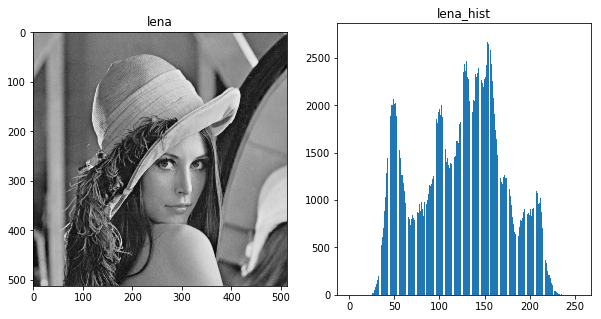

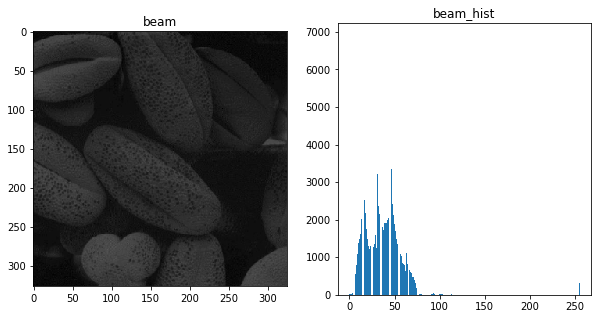

In [3]:
plot_img_and_hist(lena,'lena')
plot_img_and_hist(beam,'beam')

取遮罩後的直方圖  
先自定義一個遮罩  
再把遮罩放上calcHist來計算直方圖

In [4]:
mask = np.zeros(lena.shape,np.uint8)

mask[200:300,200:400] = 255

mask_lena = cv.bitwise_and(lena,mask)

hist_mask_lena = cv.calcHist([lena],[0],mask,[256],[0,256])


plot_img_and_hist(lena,'lena')
plt.figure(figsize=(10,5))
plt.subplot(1,2,1),plt.imshow(mask_lena,'gray'),plt.title('mask_lena')
plt.subplot(1,2,2),plt.bar(range(0,256), hist_mask_lena[:,0]),plt.title('hist_mask_lena')


plt.figure()
plt.plot(hist_lena,label='origin'),plt.plot(hist_mask_lena,label='mask')
plt.legend()

NameError: name 'np' is not defined

## equalizeHist

直方圖均化  
opencv的直方圖均化已經包成一組函式  
可以利用該函式做直方圖均化

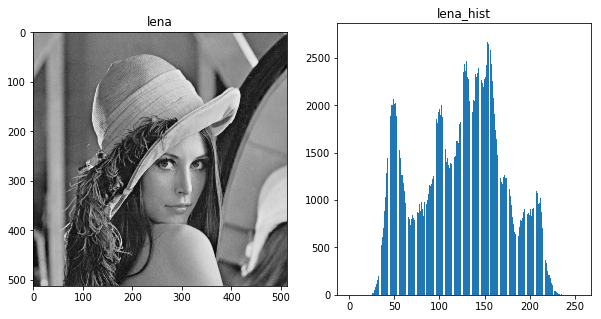

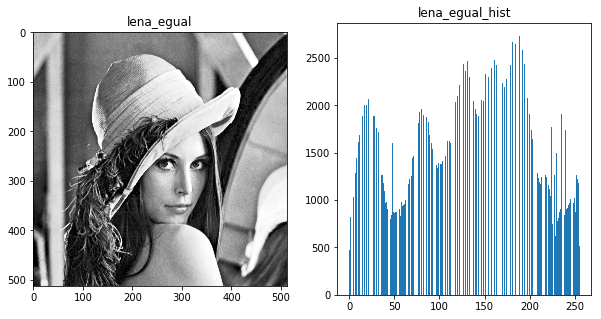

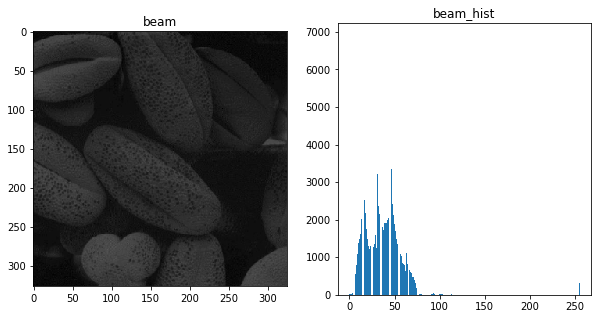

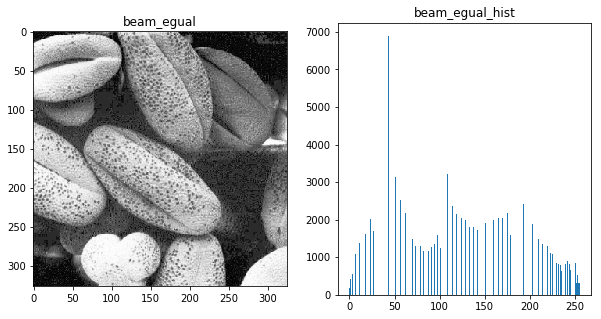

In [5]:
lena_equal = cv.equalizeHist(lena)
beam_equal = cv.equalizeHist(beam)

plot_img_and_hist(lena,'lena')
plot_img_and_hist(lena_equal,'lena_egual')

plot_img_and_hist(beam,'beam')
plot_img_and_hist(beam_equal,'beam_egual')

## createCLAHE

equalizeHist是以整張圖下去做直方圖均化  
在某些情況下並不是最好的方法做直方圖等化  
openCV另外提供了一個以局部來做直方圖等化的函式  
該函式送入兩個參數:
* clipLimit: 閥值的大小
* tileGridSize: 判斷的區域大小

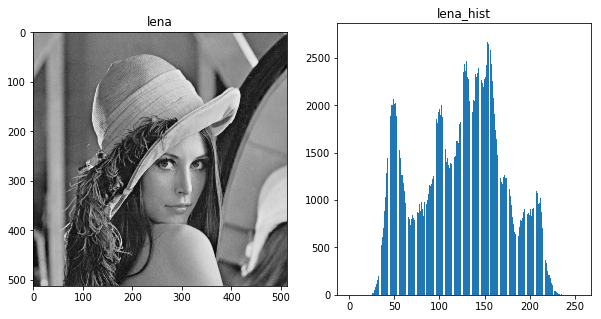

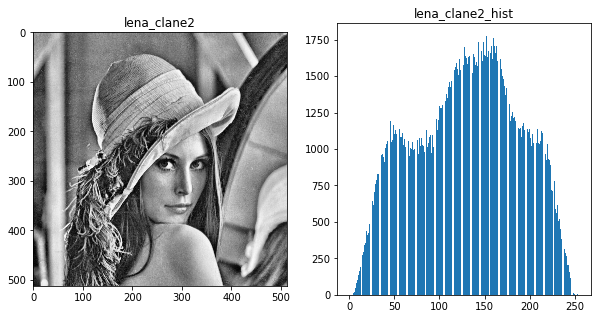

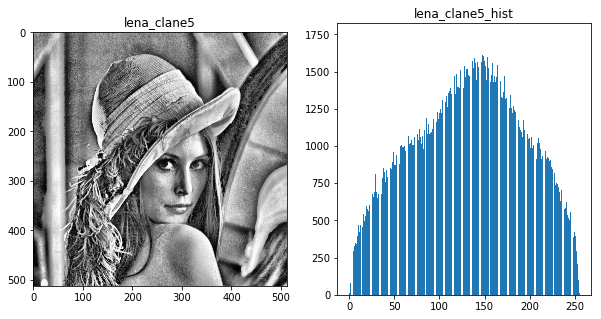

In [6]:
cln2 = cv.createCLAHE(2.0,(9,9))
lena_clane2 = cln2.apply(lena)

cln5 = cv.createCLAHE(5.0,(9,9))
lena_clane5 = cln5.apply(lena)

plot_img_and_hist(lena,'lena')
plot_img_and_hist(lena_clane2,'lena_clane2')
plot_img_and_hist(lena_clane5,'lena_clane5')